<a href="https://colab.research.google.com/github/Houmayan/Regression/blob/main/Cifar10_with_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape, y_train.shape

((10000, 32, 32, 3), (50000, 1))

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

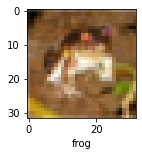

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


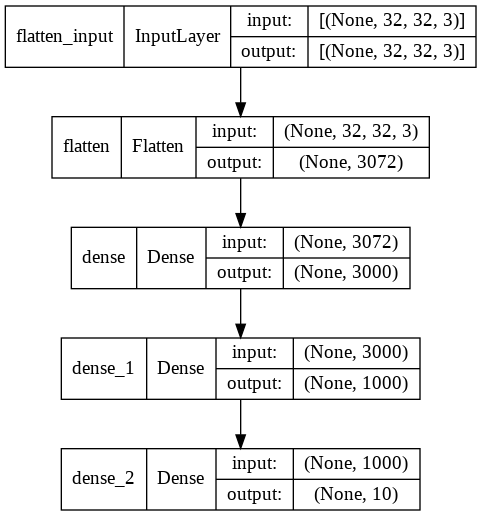

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.summary()
plot_model(ann, to_file='mlp-mnist.png', show_shapes=True)



In [ ]:
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
391/391 [==============================] - 7s 13ms/step - loss: 2.0512 - accuracy: 0.3116
Epoch 2/5
391/391 [==============================] - 5s 13ms/step - loss: 1.6684 - accuracy: 0.4048
Epoch 3/5
391/391 [==============================] - 5s 13ms/step - loss: 1.5757 - accuracy: 0.4376
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 1.5147 - accuracy: 0.4589
Epoch 5/5
391/391 [==============================] - 5s 13ms/step - loss: 1.4725 - accuracy: 0.4747


In [ ]:
# validate the model on test dataset to determine generalization
_, acc = ann.evaluate(X_test,
                        y_test,
                        batch_size=128,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 47.0%
